In [36]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import numpy as np
# from cmocean import cm
import netCDF4 as nc
import matplotlib.pyplot as plt

#### Notes to self:
#### OVERARCHING GOAL of project: 
Understand role of changing atmospheric ozone in carbon sink of the southern ocean
#### Experimental design:
"Therefore, we will have three set of forcing, one with no ozone, one with ozone but no ozone recovery, and one with best estimated ozone recovery. This set will nicely border the possible evolution of ozone this century." (from CELOS grant)
#### Goal of this notebook:
Familiarize self with the various forcing products. 
#### Knowledge gaps to fill in:
    - where are the 3 sets of forcing? how do they work?
#### location notes from dave:
    This is the standard forcing we use for our model runs
            `/gpfs/data/greenocean/software/products/NCEPForcingData/`
    ERA5 forcing (still being verified), in daily and 6-hourly
            `/gpfs/data/greenocean/software/products/ERA5Forcing/`
    This is what Kat Turner (master’s student) produced. The forcing data for the model based on the Met Office data
            `/gpfs/data/greenocean/software/products/MetOffice/withOzone/`
    This is the data we received from The Met Office (note we have 2 directories called < insert something unfathomable > )
            `/gpfs/data/greenocean/software/resources/MetOffice/ozone/`

#### 

### open some year of metoffice data

In [16]:
tdir = '/gpfs/data/greenocean/software/products/MetOffice/withOzone/'
tfilmet = 'MetOffice_wind2020.nc'
MO = nc.Dataset(f'{tdir}{tfilmet}')
print('')
print(f'{tfilmet} file contents')
print(MO)

tdirncep = '/gpfs/data/greenocean/software/products/NCEPForcingData/'
tfilncep = 'ncep_bulk_2020.nc'
print('')
print(f'{tfilncep} file contents')
NCEP = nc.Dataset(f'{tdirncep}{tfilncep}')
print(NCEP)


MetOffice_wind2020.nc file contents
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(182), y(149), time_counter(365)
    variables(dimensions): float32 glam(y,x), float32 gphi(y,x), float32 time_counter(time_counter), float64 uwind10m(time_counter,y,x), float64 vwind10m(time_counter,y,x)
    groups: 


ncep_bulk_2020.nc file contents
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(182), y(149), deptht(1), time_counter(366)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(y,x), float32 time_counter(time_counter), float32 air(time_counter,y,x), float32 pres(time_counter,y,x), float32 humidity(time_counter,y,x), float32 wspd(time_counter,y,x), float32 uwnd(time_counter,y,x), float32 vwnd(time_counter,y,x), float32 tcdc(time_counter,y,x), float32 prate(time_counter,y,x)
    groups: 



#### let's get out wind speed (sqrt(u2+v2)), plot one day for each, and plot domain averages over the course of the year

In [31]:
MO_uw = MO['uwind10m'][:]
MO_vw = MO['vwind10m'][:]
MO_wspd = np.sqrt(MO_uw**2 + MO_vw**2)
print(f'Met Office ozone forcing, year 2020 max. windspeed: {np.nanmax(MO_wspd)}')
print(f'Met Office ozone forcing, year 2020 min. windspeed: {np.nanmin(MO_wspd)}')
NCEP_uw = NCEP['uwnd'][:]
NCEP_vw = NCEP['vwnd'][:]
NCEP_origwspd = NCEP['wspd'][:]
NCEP_wspd = np.sqrt(NCEP_uw**2 + NCEP_vw**2)
print(f'NCEP standard forcing, year 2020 max. windspeed: {np.nanmax(NCEP_wspd)}')
print(f'NCEP standard forcing, year 2020 min. windspeed: {np.nanmin(NCEP_wspd)}')
print('comparing calculated windspeed from the u and v velocities with what is included a priori in the netcdf:')
print(f'NCEP standard forcing, year 2020 max. windspeed: {np.nanmax(NCEP_origwspd)}')
print(f'NCEP standard forcing, year 2020 min. windspeed: {np.nanmin(NCEP_origwspd)}')
print('close but not identical...rounding? what?')

Met Office ozone forcing, year 2020 max. windspeed: 28.792690882133865
Met Office ozone forcing, year 2020 min. windspeed: 0.0013395665318499729
NCEP standard forcing, year 2020 max. windspeed: 31.512340545654297
NCEP standard forcing, year 2020 min. windspeed: 0.0009264976833947003
comparing calculated windspeed from the u and v velocities with what is included a priori in the netcdf:
NCEP standard forcing, year 2020 max. windspeed: 31.82965660095215
NCEP standard forcing, year 2020 min. windspeed: 0.0
close but not identical...rounding? what?


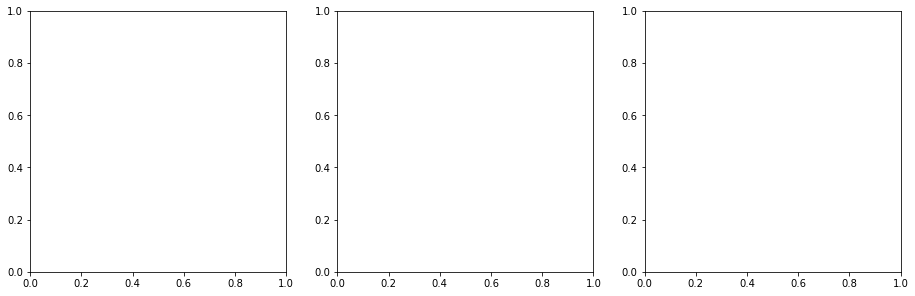

In [35]:
fact = 0.6
fig, axs = plt.subplots(1,3, figsize=(26*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()